<div align="center">
    <h1><b>Εργασία Ενισχυτικής Μηχανικής Μάθησης</b></h1>
</div>

## **Εισαγωγικά**
Αυτό το notebook αποτελεί κομμάτι μιας εργασίας στο μάθημα **'Ενισχυτική Μηχανική Μάθηση & Στοχαστικά Παίγνια'** του τμήματος **[Πληροφορικής και Τηλεπικοινωνιών](https://www.di.uoa.gr/)** του **Ε.Κ.Π.Α.**

### **Σκοπός**
Σκοπός της εργασίας είναι **πειραματιστούμε** με διάφορους **αλγορίθμους μηχανικής μάθησης**, έτσι ώστε να εκπαιδεύσουμε ένα μοντέλο πάνω σε ένα συγκεκριμένο **περιβάλλον** του **[Open-AI Gym ή Gymnasium](https://www.gymlibrary.dev/index.html)**

### **Μέλη Εργασίας**
Τα μέλη που αποτελούν αυτήν την εργασία είναι τα ακόλουθα:
| Όνομα | Επώνυμο | Α.Μ. | Email
| :---: | :---: | :---: | :---: |
| Αντώνης | Ζήκας | 1115202100038 | sdi2100038@di.uoa.gr |
| Παναγιώτης | Παπαποστόλου | 1115202100142 | sdi2100142@di.uoa.gr |

## **Επιλογή και Ανάλυση Περιβάλλοντος**
Σε αυτήν την εργασία επιλέξαμε να ασχοληθούμε με το περιβάλλον **[CartPole-v1](https://www.gymlibrary.dev/environments/classic_control/cart_pole/)** το οποίο ανήκει στην κατηγορία **[Clasic Control](https://www.gymlibrary.dev/environments/classic_control/)**. 

<div align="center">
<img src="../assets/imgs/cart-pole-diagram.png" width="500px">    
</div>

Ας αναλύσουμε αυτό το περιβάλλον.

### **Action Space**:
Για το συγκεκριμένο περιβάλλον υπάρχουν **δύο ενέργειες** (actions) που μπορούν να γίνουν. Συγκεκριμένα το **καροτσάκι** (cart) μπορεί να μετακινηθεί είτε **αριστερά** είτε **δεξιά**. Οι ενέργειες αυτές αναπαρίστανται με **0** και **1** αντίστοιχα και περιγράφονται στον παρακάτω πίνακα:

| Number | Action |
| :---: | :---: |
| 0 | Μετακίνηση προς τα αριστερά |
| 1 | Μετακίνηση προς τα δεξιά |

Επομένως το **action** του συγκεκριμένου περιβάλλοντος είναι ένα `ndarray` διαστάσεων `(1,)` και μπορεί να πάρει δύο τιμές `{1, 0}`.

### **Observation Space**:
Το **observation space** για το συγκεκριμένο περιβάλλον είναι μία συλλογή από **4** τιμές.
1. Την **θέση** του καροτσιού **(Cart Position)**
2. Την **ταχύτητα** του καροτσιού **(Cart Velocity)**
3. Την **γωνία** που σχηματίζει το κοντάρι με τον κάθετο άξονα **(Pole Angle)**
4. την **ταχύτητα** του κονταριού καθώς πέφτει **(Pole Angular Velocity)**

Αυτές οι τιμές αποθηκέυονται μέσα σε ένα `ndarray` διαστάσεων `(4,)` και κάθε τιμή έχει ορισμένα συγκεκριμένα όρια τα οποία περιγράφονται παρακάτω:

| Array index | Observation | Min Value | Max Value |
| :---: | :---: | :---: | :---: |
| 0 | Cart Position | $-4.8$ | $4.8$ |
| 1 | Cart Velocity | $-\infty$ | $+\infty$ |
| 2 | Pole Angle | ~ $0.418$ rad (-$24^{\circ}$) | ~ $0.418$ rad ($24^{\circ}$) |
| 3 | Pole Angular Velocity | $-\infty$ | $+\infty$ |


### **Reward**:
Για κάθε βήμα στην εκπαίδευση του μοντέλου η **αμοιβή** (reward) που λαμβάνει ο επιλεγμένος **πράκτορας** (agent) είναι `+1` συμπεριλαμβανομένου και του **βήματος τερματισμού**. Το **κατώφλι** (threshold) των αμοιβών στο συγκεκριμένο περιβάλλον είναι **475**.

## **Φόρτωση Περιβάλλοντος στην Python**

In [8]:
import gymnasium as gym

env = gym.make('CartPole-v1')
observations = env.observation_space.shape[0]
actions = env.action_space.n

print(f"Observations: {observations}, Actions: {actions}")

Observations: 4, Actions: 2


Όπως παρατηρούμε από την παραπάνω εκτέλεση του κώδικα, τα **observations** και τα **actions** είναι πράγματι **4** και **2** αντίστοιχα. Ας επιχειρήσουμε να τρέξουμε αυτό το περιβάλλον **χωρίς** κάποιο εκπαιδευμένο μοντέλο και ας παρατηρήσουμε τα αποτελέσματα.

In [22]:
epochs = 100
epochs_scores = []

for epoch in range(1, epochs+1):
    env.reset()
    done = False
    score = 0
    while not done:
        action = env.action_space.sample() # Chose a random action from 0 and 1
        observation, reward, terminated, truncated, _ = env.step(action)
        score += reward
        if terminated or truncated:
            observation, _ = env.reset()
            done = True
    
    epochs_scores.append(score)
    
env.close()

Ας οπτικοποιήσουμε το συνολικό **score** που έπιασε το περιβάλλον μας για κάθε **εποχή** (epoch).

<Figure size 640x480 with 0 Axes>

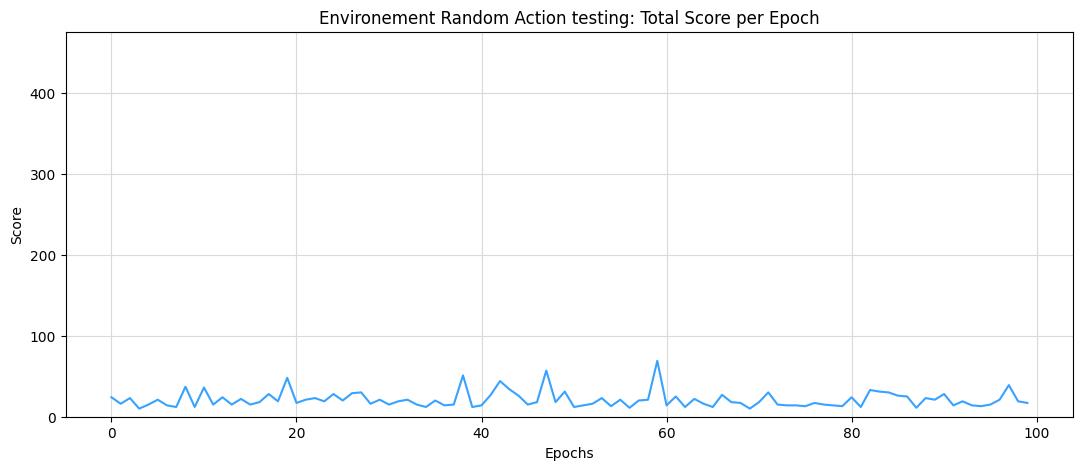

In [32]:
from matplotlib import pyplot as plt

plt.figure()
plt.figure(figsize=(13, 5))
plt.plot(epochs_scores, color='#37A2FF')
plt.ylim(0, 475)
plt.title("Environement Random Action testing: Total Score per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.grid(color='#DADADA')
plt.show()

Από το παραπάνω διάγραμμα παρατηρούμε πως το συνολικό **score** που πιάνει το περιβάλλον είναι πολύ χαμηλό. Στόχος μας λοιπόν είναι να **εκπαιδεύσουμε** ένα μοντέλο, έτσι ώστε να καταφέρουμε να αυξήσουμε το **score** μέχρι και το αντίστοιχο **threashold** του περιβάλλοντος, το οποίο είναι **475**.

## **Υλοποίηση του αλγορίθμου DQN (Deep Q-Network)**
Θα ξεκινήσουμε υλοποιώντας αλγόριθμο **[DQN](https://medium.com/@samina.amin/deep-q-learning-dqn-71c109586bae)** ο οποίος θα χρησιμοποιηθεί για την εκπαίδευση του μοντέλου μας. Ο αλγόριθμος αυτός απαιτεί τη χρήση ενός **νευρωνικού δικτύου** (neural network) όπου για την κατασκευή του θα χρησιμοποιήσουμε το πακέτο **[PyTorch](https://pytorch.org/)**.

<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:2400/format:webp/1*aqNgmfyBIStLrf9k7d9cng.jpeg" width="500px">
</div>